In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# import dataset
df = pd.read_csv("ibm-common-stock-closing-prices.csv")

In [3]:
df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [4]:
df.rename(columns= {"IBM common stock closing prices": "Closing"})

,Date,Closing
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50
...,...,...
1004,1965-12-28,502.25
1005,1965-12-29,498.00
1006,1965-12-30,500.00
1007,1965-12-31,499.00


In [5]:
df.drop(1008)

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50
...,...,...
1003,1965-12-27,500.00
1004,1965-12-28,502.25
1005,1965-12-29,498.00
1006,1965-12-30,500.00


In [6]:
df.rename(columns= {"IBM common stock closing prices": "Closing"}, inplace=True)

In [7]:
df.tail(10)

,Date,Closing
999,1965-12-20,501.75
1000,1965-12-21,506.75
1001,1965-12-22,505.75
1002,1965-12-23,499.00
1003,1965-12-27,500.00
1004,1965-12-28,502.25
1005,1965-12-29,498.00
1006,1965-12-30,500.00
1007,1965-12-31,499.00
1008,IBM common stock closing prices,NaN


In [8]:
df.drop(1008, inplace=True)

In [9]:
df.tail(10)

,Date,Closing
998,1965-12-17,498.50
999,1965-12-20,501.75
1000,1965-12-21,506.75
1001,1965-12-22,505.75
1002,1965-12-23,499.00
1003,1965-12-27,500.00
1004,1965-12-28,502.25
1005,1965-12-29,498.00
1006,1965-12-30,500.00
1007,1965-12-31,499.00


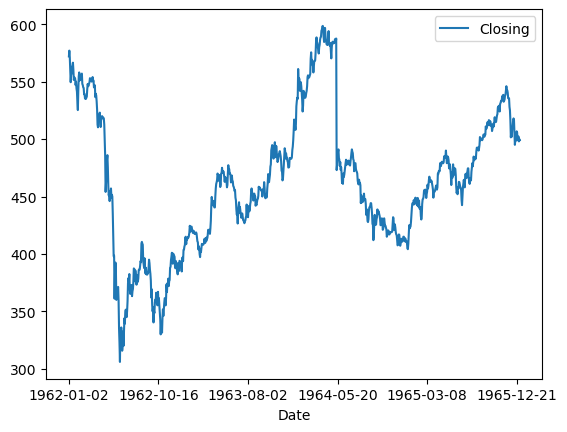

In [12]:
df.plot(x="Date", y="Closing");

In [13]:
df["Date"]

0       1962-01-02
1       1962-01-03
2       1962-01-04
3       1962-01-05
4       1962-01-08
           ...    
1003    1965-12-27
1004    1965-12-28
1005    1965-12-29
1006    1965-12-30
1007    1965-12-31
Name: Date, Length: 1008, dtype: object

In [14]:
df["Date"] = df["Date"].astype("datetime64[ns]")

In [15]:
df["Date"]

0      1962-01-02
1      1962-01-03
2      1962-01-04
3      1962-01-05
4      1962-01-08
          ...    
1003   1965-12-27
1004   1965-12-28
1005   1965-12-29
1006   1965-12-30
1007   1965-12-31
Name: Date, Length: 1008, dtype: datetime64[ns]

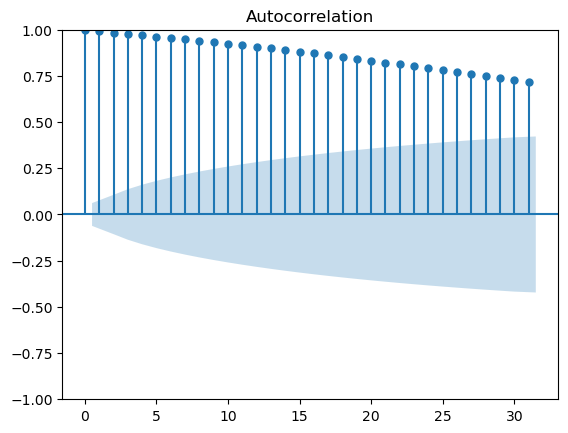

In [17]:
plot_acf(df["Closing"]);

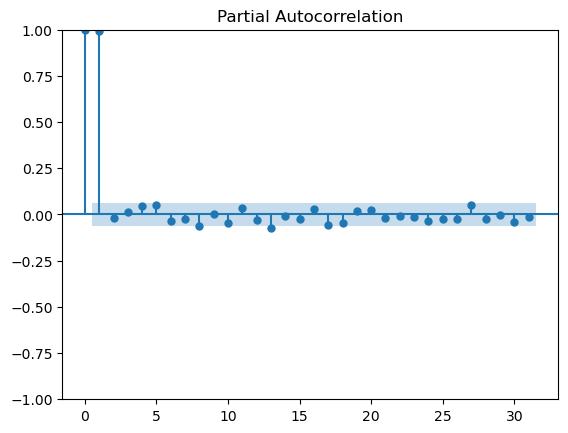

In [19]:
plot_pacf(df["Closing"]);

In [23]:
# order = (p, d, q) p=1 from pacf, q=0 from acf, we have no d yet
model = SARIMAX(df["Closing"], order=(1, 0, 0)).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Closing   No. Observations:                 1008
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3349.383
Date:                Thu, 20 Feb 2025   AIC                           6702.767
Time:                        19:19:40   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                               - 1008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   2018.778      0.000       0.999       1.001
sigma2        44.6602      0.376    118.645      0.000      43.922      45.398
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):            315436.95
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -5.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        89.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

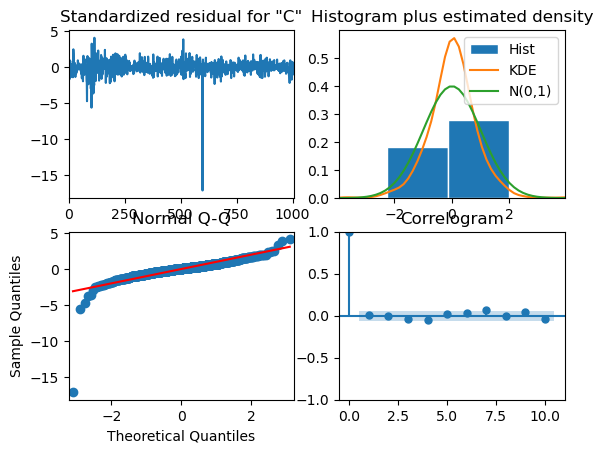

In [27]:
model.plot_diagnostics();

In [28]:
forecast_values = model.get_forecast(steps=10)

In [32]:
forecast_values.predicted_mean

1008    498.960677
1009    498.921357
1010    498.882040
1011    498.842726
1012    498.803415
1013    498.764108
1014    498.724803
1015    498.685502
1016    498.646203
1017    498.606908
Name: predicted_mean, dtype: float64

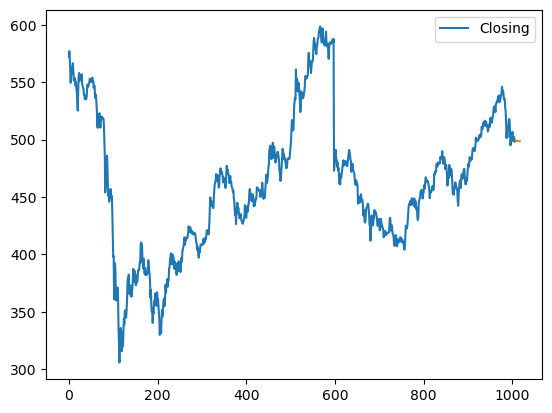

In [34]:
df.plot(y="Closing")
forecast_values.predicted_mean.plot();

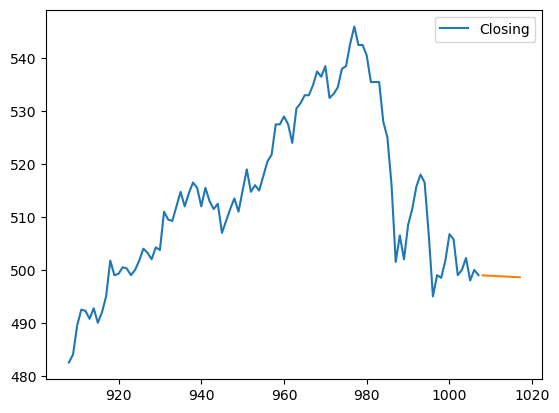

In [38]:
df.iloc[-100:].plot(y="Closing")
forecast_values.predicted_mean.plot();

In [42]:
int(df.shape[0]*.7)

705

In [45]:
train = df["Closing"].iloc[:int(df.shape[0]*.7)]
test = df["Closing"].iloc[int(df.shape[0]*.7):]

In [46]:
train.shape

(705,)

In [47]:
test.shape

(303,)

In [48]:
train.tail()

700    428.0
701    421.0
702    422.0
703    425.5
704    431.0
Name: Closing, dtype: float64

In [49]:
test.head()

705    428.00
706    424.25
707    424.50
708    423.00
709    421.38
Name: Closing, dtype: float64

In [50]:
model = SARIMAX(train, order=(0,0,1)).fit()

In [51]:
forecast_values = model.get_forecast(int(df.shape[0]*.3))

<AxesSubplot:>

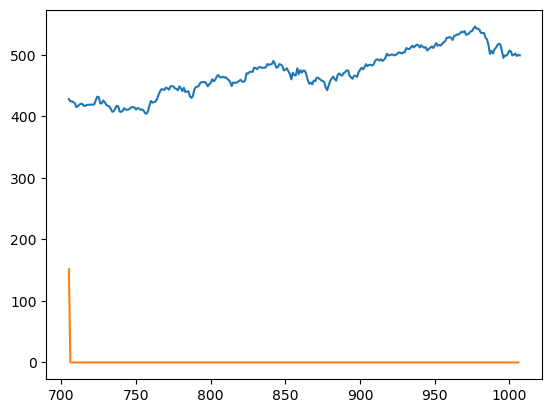

In [53]:
test.plot()
forecast_values.predicted_mean.plot()